In [ ]:
# Anaconda Navigator에서 party 설치
# 제일 오래된 머신러닝 알고리즘
# 데이터에 따라 ML,DL 사용하는 상황이 다름.

In [1]:
library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


# Sampling

In [3]:
set.seed(1234)
# 샘플링하는 라이브러리
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [22]:
samp <- createDataPartition(iris$Species, p=0.7, list=F)
samp

Resample1
1
2
3
6
9
10
11
13
15
17


In [14]:
#학습용 데이터셋
data.tr <- iris[samp,]

# 테스트용 데이터셋
data.test <- iris[-samp,]

In [15]:
# 학습시키기
model.ctree <- ctree(Species ~., data=data.tr)

In [16]:
# 문제및 정답 만들기
x <- subset(data.test, select = -Species)
y <- data.test$Species

In [17]:
# 검증하기
pred <- predict(model.ctree, x)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     versicolor
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  versicolor virginica  virginica  virginica 
[37] virginica  virginica  versicolor virginica  virginica  versicolor
[43] versicolor virginica  virginica 
Levels: setosa versicolor virginica

In [19]:
# 예측과 오분류표
mean(pred == y)
table(pred, y)

[1] 0.8888889

            y
pred         setosa versicolor virginica
  setosa         14          0         0
  versicolor      1         15         4
  virginica       0          0        11

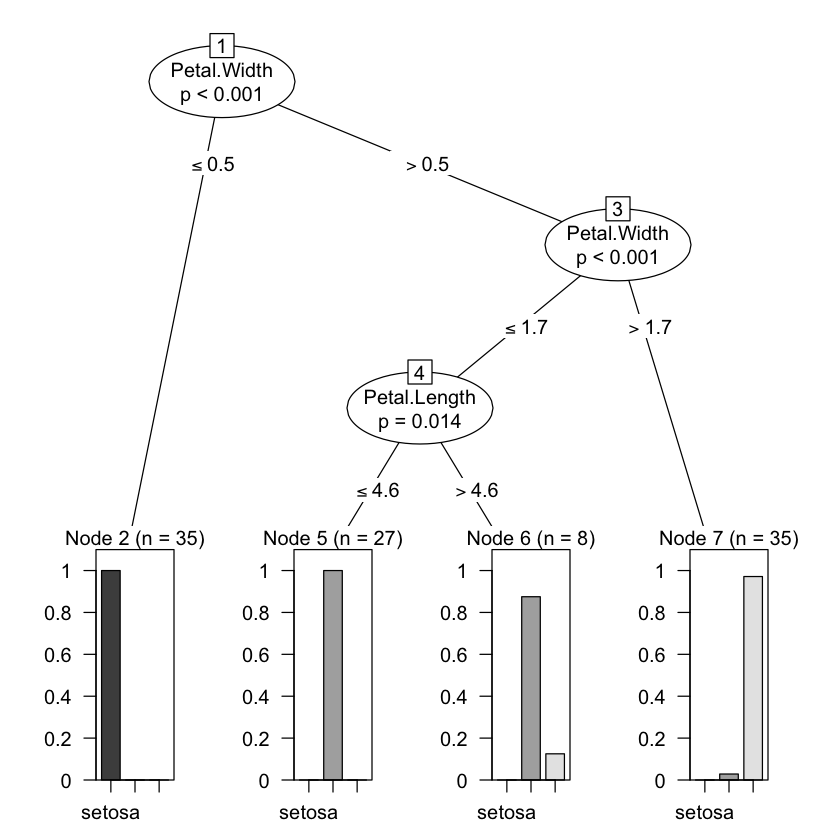

In [20]:
plot(model.ctree)